In [1]:
%matplotlib notebook

#%matplotlib qt
import numpy as np
import pandas as pd
import time
# from amc_parser import *
# from T3Dviewer import *
import os
import sys
sys.path.append("..")
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, tan, cos, pi, radians, degrees
import cv2
import matplotlib.image as mpimg
import ipywidgets as widgets
from ipywidgets import interact, interactive

%autosave 600

def eulerAnglesToRotationMatrix(theta) :
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         cos(theta[0]), -sin(theta[0]) ],
                    [0,         sin(theta[0]), cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[cos(theta[1]),    0,      sin(theta[1])  ],
                    [0,                1,      0                   ],
                    [-sin(theta[1]),   0,      cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[cos(theta[2]),    -sin(theta[2]),    0],
                    [sin(theta[2]),    cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R

def cMatrix(fLength,cx,cy):
    return np.array([[fLength,0,cx,0],[0,fLength,cy,0],[0,0,1,0]])



Autosaving every 600 seconds


root:
    Order - Values [TX TY TZ : Translation, RX RY RZ: rotation] Channels of motion on VICON
    
Data information:
    root:
    order, axis, position, orientation
    bonedata:
    id, name, direction, length, axis, dof, limits (?), parent, child

end goal:
get table of global position for each part ([x,y,z]-data)(bone-column)(time-row)

In [6]:
from src.data.amc_parser import parse_asf, parse_amc

In [8]:
#abs_path = os.getcwd()
asf_path = '../data/raw/01.asf'
amc_path = '../data/raw/01_01.amc'
joints = parse_asf(asf_path)
motions = parse_amc(amc_path)


In [9]:
# a=list(joints.keys())
# MCapVal = pd.DataFrame(data=None,columns=a)

#for j in joints.values():
    #j.name
    #(j.__dict__.keys())
joints.get('root').__dict__

{'name': 'root', 'direction': array([[0.],
        [0.],
        [0.]]), 'length': 0, 'C': array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]), 'Cinv': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), 'limits': array([[0., 0.],
        [0., 0.],
        [0., 0.]]), 'parent': None, 'children': [<src.data.amc_parser.Joint at 0x25719b326d8>,
  <src.data.amc_parser.Joint at 0x25719b32b38>], 'coordinate': None, 'matrix': None}

In [34]:
#motion is a list -> dict
#motions[0]['root']
#np.reshape(np.array(motions[0]['root'][:3]), [3, 1])

[9.37216, 17.8693, -17.3198, -2.01677, -7.59696, -3.23164]

In [36]:
#joints['root'].set_motion(motions[1])
#loopList = range(len(motions))


In [10]:
a=[]
b=list(joints.keys())
MCapVal = pd.DataFrame(data=None,columns=b)
loopList = range(len(motions))

for i in loopList[1:]:
    joints['root'].set_motion(motions[i])
    for j in joints.values():
        a.append(j.coordinate)
        #print(j.name)
        #MCapVal[j.name].append(j.coordinate)
    #print(a)
    MCapVal.loc[len(MCapVal), :] = a
    a=[]
    #break
MCapVal*=1/0.45
# All values are 0.45 of an inch
#MCapVal.append(a)

    root lhipjoint rhipjoint lowerback
    lhipjoint lfemur
    lfemur ltibia
    ltibia lfoot
    lfoot ltoes
    rhipjoint rfemur
    rfemur rtibia
    rtibia rfoot
    rfoot rtoes
    lowerback upperback
    upperback thorax
    thorax lowerneck lclavicle rclavicle
    lowerneck upperneck
    upperneck head
    lclavicle lhumerus
    lhumerus lradius
    lradius lwrist
    lwrist lhand lthumb
    lhand lfingers
    rclavicle rhumerus
    rhumerus rradius
    rradius rwrist
    rwrist rhand rthumb
    rhand rfingers
    
Order:
0:1,6,11
1:2
2:3
3:4
4:5
6:7
7:8
8:9
9:10
11:12
12:13
13:14,17,24
14:15
15:16
17:18
18:19
19:20
20:21,23
21:22
24:25
25:26
26:27
27:28,30
28:29
Parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
Child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

    root lhipjoint rhipjoint lowerback
    lhipjoint lfemur
    lfemur ltibia
    ltibia lfoot
    lfoot ltoes
    rhipjoint rfemur
    rfemur rtibia
    rtibia rfoot
    rfoot rtoes
    lowerback upperback
    upperback thorax
    thorax lowerneck lclavicle rclavicle
    lowerneck upperneck
    upperneck head
    lclavicle lhumerus
    lhumerus lradius
    lradius lwrist
    lwrist lhand lthumb
    lhand lfingers
    rclavicle rhumerus
    rhumerus rradius
    rradius rwrist
    rwrist rhand rthumb
    rhand rfingers
    
Order:
0:1,6,11
1:2
2:3
3:4
4:5
6:7
7:8
8:9
9:10
11:12
12:13
13:14,17,24
14:15
15:16
17:18
18:19
19:20
20:21,23
21:22
24:25
25:26
26:27
27:28,30
28:29
Parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
Child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

<IPython.core.display.Javascript object>


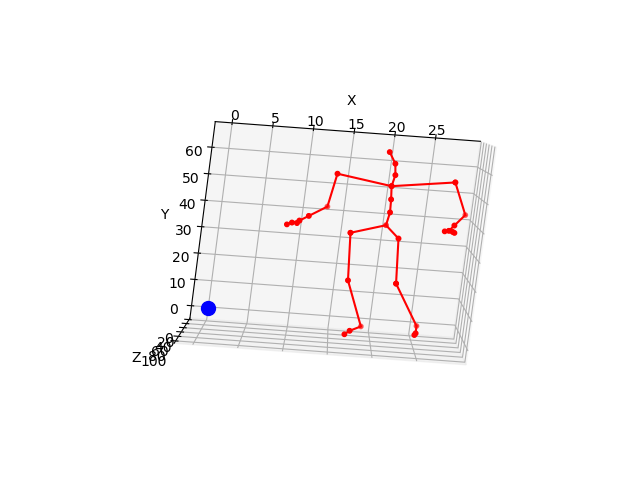

In [18]:
parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]


#MCapVal.iloc[0,:] all in this row
#list(range(len(MCapVal.columns.values)))
#pd.DataFrame(MCapVal.columns.values)

#x,y,z = [MCapVal.iloc[0,0][j] for j in range(3)]
#print(x,y,z,MCapVal.iloc[0,0])
#MCapVal.iloc[0,0][0]
#[MCapVal.iloc[0,parent[0]][0][0], MCapVal.iloc[0,child[0]][0][0]]
plt.figure()
ax = plt.gca(projection="3d")

for i in range(len(parent)):
    x,y,z = [[MCapVal.iloc[2749,parent[i]][j][0], 
              MCapVal.iloc[2749,child[i]][j][0]] for j in range(3)] 
    ax.scatter(x,y,z,c='r', s=10)
    ax.plot(x,y,z, c='r')

# %matplotlib notebook
ax.scatter(0,0,0,c='b',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=100,azim=-70)
# plt.figure()
plt.show()
# plt.close()
#len(a)
#a
#MCapVal
#joints['ltibia'].__dict__

<IPython.core.display.Javascript object>


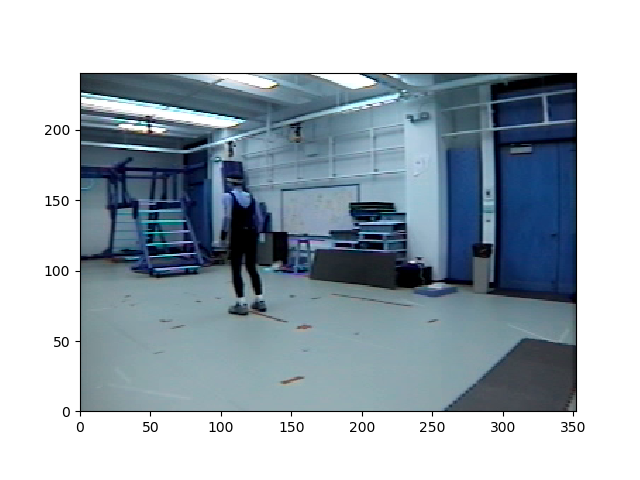

In [5]:
vidcap=cv2.VideoCapture('data/01_01.mpg')

# frame_pos=2/2750*23356.66
# vidcap.set(cv2.CAP_PROP_POS_MSEC,753)
vidcap.set(cv2.CAP_PROP_POS_FRAMES,417)
# vidcap.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
# print(vidcap.get(cv2.CAP_PROP_POS_MSEC))
# b=vidcap.get(cv2.CAP_PROP_POS_FRAMES)
# vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

success,image = vidcap.read()
# vidcap.get(4)
plt.figure()
plt.imshow(image,aspect='equal', extent=[0,vidcap.get(3),0,vidcap.get(4)])
# plt.scatter(30,30,c='r',s=10)
# for i in range(len(parent)):
#     px = [projX[parent[i]], projX[child[i]]] 
#     py = [projY[parent[i]], projY[child[i]]]
    
#     plt.scatter(px,py, c='b', s=10)
#     plt.plot(px,py, c='r')

# plt.ylim([0,500])
# plt.xlim([0,500])
plt.show()



#cv2.imshow('frame',image)
# cv2.imwrite("frame00.jpg",image)
# length = int(vidcap.get(cv2.CAP_PROP_FPS))
# print(length)
# vidcap.get(cv2.CAP_PROP_POS_FRAMES)
#plt.show()
#a=joints['head'].coordinate

<IPython.core.display.Javascript object>


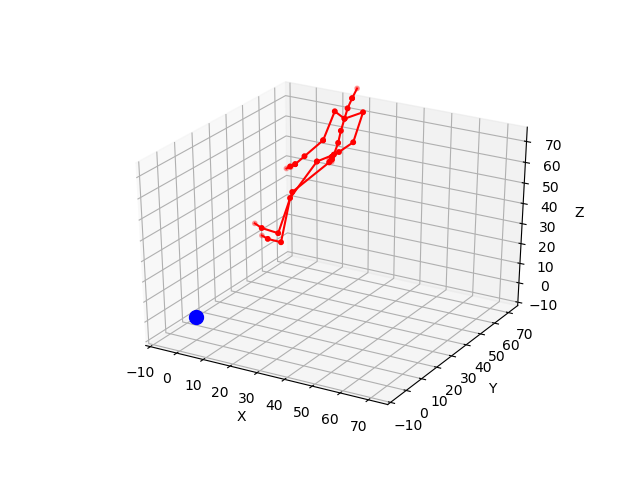

<IPython.core.display.Javascript object>


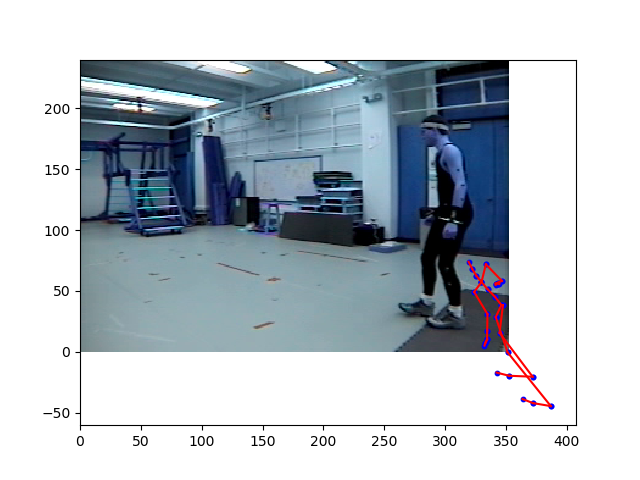

In [11]:
parent=[0,0,0,1,2,3,4,6,7,8,9,11,12,13,13,13,14,15,17,18,19,20,20,21,24,25,26,27,27,28]
child =[1,6,11,2,3,4,5,7,8,9,10,12,13,14,17,24,15,16,18,19,20,21,23,22,25,26,27,28,30,29]

# Camera Parameters
# 16.46mm (W) 0.648 inch x 12.10 (H) 0.476 inch; 20.43mm diagonal
# Need to convert pixel length to world units
# Focal Length: 12.5mm 0.494 inch

# 3d Vicon data 
# 352 x 240 pixels = 0.648 x 0.476 inch
# X * 1/0.45 * 352/0.648
# Y * 1/0.45 * 240/0.476

# Intrinsic Parameters.
# fx, fy is focal length (magnification)
# cx, cy is optical center ("translation") in pixels
fx=fy= 0.494
cx = 0.648/2
cy = 0.476/2
cMatrix = np.array([[fx,0,cx,0],[0,fy,cy,0],[0,0,1,0]])
Vframe=1137
Vidframe=215

#Extrinsic parameters
rvec = (np.array([1.4715,0.4639,0.86397],np.float))
rMat = eulerAnglesToRotationMatrix(rvec)
tvec = (np.array([-28.83,-3.81,78.88],np.float))
# current tvec[10,-10,10]
wMat=np.c_[rMat,tvec]

extMCap = []
plt.figure()
ax = plt.gca(projection="3d")

#Changing 3D points
for i in range(MCapVal.iloc[Vframe,:].shape[0]):
    subMCapVal=MCapVal.iloc[Vframe,i]
    subMCapVal=np.append(subMCapVal,[1.])
    extMCapVal = np.dot(wMat,subMCapVal)
    extMCap.append(extMCapVal)
    
extMCap=pd.DataFrame(extMCap,columns = ['x','y','z'])

#Make scatter of Changed 3d Points
for i in range(len(parent)):
    x,y,z = [[extMCap.iloc[parent[i]][j], 
              extMCap.iloc[child[i]][j]] for j in range(3)] 
    ax.scatter(x,y,z,c='r', s=10)
    ax.plot(x,y,z, c='r')
    
# Original 3d points
# for i in range(len(parent)):
#     x,y,z = [[MCapVal.iloc[550,parent[i]][j][0], 
#               MCapVal.iloc[550,child[i]][j][0]] for j in range(3)] 
#     ax.scatter(x,y,z,c='g', s=10)
#     ax.plot(x,y,z, c='r')

projX = []
projY = []

#Projection
for i in range(extMCap.shape[0]):
    a=extMCap.iloc[i]
    a=np.append(a,[1.])
    
    b=np.dot(cMatrix,a)

    projX.append(b[0]/b[2])
    projY.append(b[1]/b[2])

for i in range(len(parent)):
    px = [projX[parent[i]], projX[child[i]]] 
    py = [projY[parent[i]], projY[child[i]]]
    
    ax.scatter(px,py,fx, c='b', s=10)
    ax.plot(px,py,fx, c='r')

ax.scatter(0,0,0,c='b',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d(-10,75)
ax.set_ylim3d(-10,75)
ax.set_zlim3d(-10,75)
plt.show()

# Show just 2d in seperate window

plt.figure()

vidcap=cv2.VideoCapture('data/01_01.mpg')
vidcap.set(cv2.CAP_PROP_POS_FRAMES,Vidframe)

success,image = vidcap.read()

projPixX = np.array(projX)
projPixY = np.array(projY)

projPixX *= 352/0.648
projPixY *=  240/0.476

plt.imshow(image,aspect='equal', extent=[0,vidcap.get(3),0,vidcap.get(4)])
for i in range(len(parent)):
    px = [projPixX[parent[i]], projPixX[child[i]]]
#     px = px * 352/0.648
    py = [projPixY[parent[i]], projPixY[child[i]]]
#     py = py * 240/0.476
    plt.scatter(px,py, c='b', s=10)
    plt.plot(px,py, c='r')

# plt.ylim([0,500])
# plt.xlim([0,500])

plt.show()

In [31]:
projPixX = np.array(projX)
projPixX*=5


([0.6419358598727175,
  0.6172684443702742,
  0.6076870905251601,
  0.6318746437014895,
  0.6095484676831445,
  0.5976628053906607,
  0.6468105381630931,
  0.613771791727708,
  0.6335769852618278,
  0.5974263710502071,
  0.579619927355604,
  0.6378956514055736,
  0.6308754140922774,
  0.6254855922097845,
  0.6211637428434855,
  0.6200111988978202,
  0.6204417829166804,
  0.5954281270052366,
  0.6007125523601103,
  0.5855570198505212,
  0.57818968475229,
  0.572589080021191,
  0.5687724995159188,
  0.5744858784157368,
  0.6622398364983786,
  0.6768249605175921,
  0.6677864488030038,
  0.6629424358111157,
  0.6681705059735076,
  0.6715368375599365,
  0.6617812274234574],
 array([3.2096793 , 3.08634222, 3.03843545, 3.15937322, 3.04774234,
        2.98831403, 3.23405269, 3.06885896, 3.16788493, 2.98713186,
        2.89809964, 3.18947826, 3.15437707, 3.12742796, 3.10581871,
        3.10005599, 3.10220891, 2.97714064, 3.00356276, 2.9277851 ,
        2.89094842, 2.8629454 , 2.8438625 , 2.8724

2d Projection is on side of 3d image, not side at 0,0,0.
<br>
Test with frame 215 & 1137

Frame 0 of video correlates to ~VICON 280
<br>
Vframe 2749 is frame of 617 
<br>
[0,280], [617,2749] y=4.0016x+280
<br>
video frame 300 goes to 1480
<br>
Frame are not the same between Vicon & video
<br>
700 frames in mpg file
<br>
29 frames per second
<br>
23356.666 msec
<BR>
image size (352,240)
***
2750 frames in VICON amc file
<br>
more frames in vicon then in mpg
<br>
2750/700* =  11/3
<br>*(round that shit)
<br> 550 Vicon Frame = 150 frame
vidcap based on ms

<IPython.core.display.Javascript object>


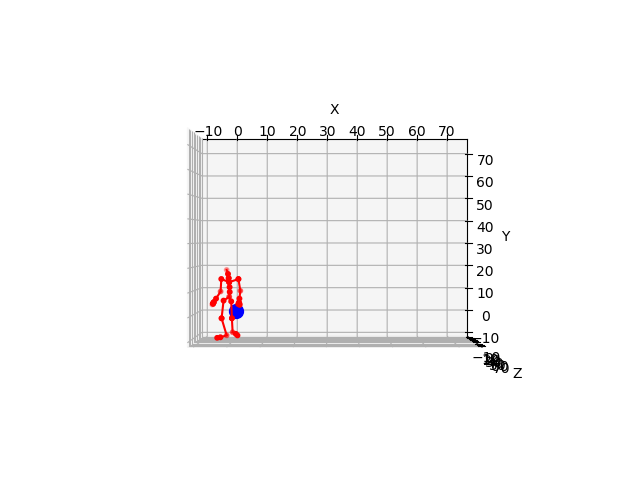

<IPython.core.display.Javascript object>


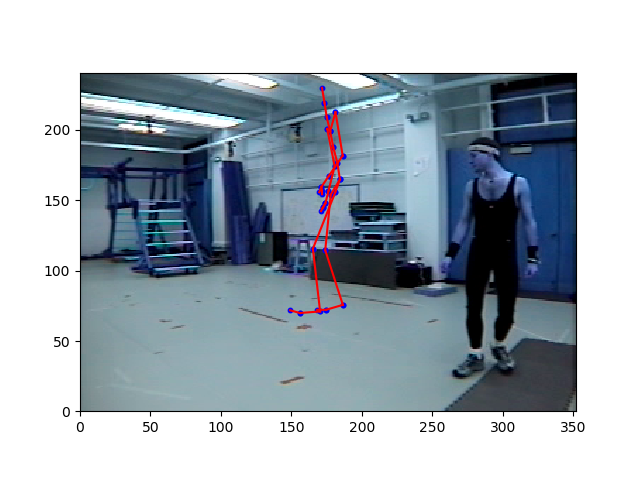

interactive(children=(IntText(value=1087, description='Vframe'), IntText(value=0, description='rx'), IntText(v…

interactive(children=(IntText(value=300, description='fLength'), Output()), _dom_classes=('widget-interact',))

In [8]:
#work here on Interactive 3d graph
import ipywidgets as widgets
from ipywidgets import interact, interactive

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

figi=plt.figure()
az= figi.add_subplot(111)

vidcap=cv2.VideoCapture('data/01_01.mpg')
vidcap.set(cv2.CAP_PROP_POS_FRAMES,203)

success,image = vidcap.read()

#Vicon Frame number
Vframe=1087
Vidframe=203
#Intrinsic Parameters
fLength = 300
cx = 352/2
cy = 240/2

#Extrinsic parameters
rotx = radians(0)
roty = radians(50)
rotz = radians(0)

transx = -40
transy = -10
transz = 30

def cMatrix(fLength,cx,cy):
    return np.array([[fLength,0,cx,0],[0,fLength,cy,0],[0,0,1,0]])


#def threed_change(rx,ry,rz):
def threed_change(Vframe,rx,ry,rz):
    ax.cla()
    #Extrinsic parameters
    rotx = radians(rx)
    roty = radians(ry)
    rotz = radians(rz)

    transx = -40
    transy = -10
    transz = 30

    rvec = (np.array([rotx,roty,rotz],np.float))
    rMat = eulerAnglesToRotationMatrix(rvec)
    tvec = (np.array([transx,transy,transz],np.float))
    wMat=np.c_[rMat,tvec]

    extMCap = []


    #Changing 3D points based on Extrinsic Parameters
    for i in range(MCapVal.iloc[Vframe,:].shape[0]):
        subMCapVal=MCapVal.iloc[Vframe,i]
        subMCapVal=np.append(subMCapVal,[1.])
        extMCapVal = np.dot(wMat,subMCapVal)
        extMCap.append(extMCapVal)

    extMCap=pd.DataFrame(extMCap,columns = ['x','y','z'])

    #Make scatter of Changed 3d Points
    for i in range(len(parent)):
        x,y,z = [[extMCap.iloc[parent[i]][j], 
                  extMCap.iloc[child[i]][j]] for j in range(3)] 
        ax.scatter(x,y,z,c='r', s=10)
        ax.plot(x,y,z, c='r')

    projX = []
    projY = []

    #Projection
    for i in range(extMCap.shape[0]):
        a=extMCap.iloc[i]
        a=np.append(a,[1.])

        b=np.dot(cMatrix(fLength,cx,cy),a)

        projX.append(b[0]/b[2])
        projY.append(b[1]/b[2])
    
    for i in range(len(parent)):
        px = [projX[parent[i]], projX[child[i]]] 
        py = [projY[parent[i]], projY[child[i]]]

        ax.scatter(px,py,fx, c='b', s=10)
        ax.plot(px,py,fx, c='r')

    ax.scatter(0,0,0,c='b',s=100)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d(-10,75)
    ax.set_ylim3d(-10,75)
    ax.set_zlim3d(-10,75)
    ax.view_init(elev=90,azim=-90)
    plt.show()

interact(threed_change,
        rx = widgets.IntText(value=0),
        ry = widgets.IntText(value=50),
        rz = widgets.IntText(value=0),
        Vframe = widgets.IntText(value=1087));

# Show just 2d in seperate window

# figi=plt.figure()
# az= figi.add_subplot(111)

# vidcap=cv2.VideoCapture('data/01_01.mpg')
# vidcap.set(cv2.CAP_PROP_POS_FRAMES,215)

# success,image = vidcap.read()

# def twod_change(fLength,cx,cy):
def twod_change(fLength):
    projX = []
    projY = []
    az.cla()
    az.imshow(image,aspect='equal', extent=[0,vidcap.get(3),0,vidcap.get(4)])
    for i in range(extMCap.shape[0]):
        a=extMCap.iloc[i]
        a=np.append(a,[1.])
    
        b=np.dot(cMatrix(fLength,cx,cy),a)

        projX.append(b[0]/b[2])
        projY.append(b[1]/b[2])
        
    for i in range(len(parent)):
        px = [projX[parent[i]], projX[child[i]]] 
        py = [projY[parent[i]], projY[child[i]]]
    
        az.scatter(px,py, c='b', s=10)
        az.plot(px,py, c='r')
        
    figi.canvas.draw_idle()

interact(twod_change,
        fLength = widgets.IntText(value=300,),
#         cx = widgets.IntText(value=300),
#         cy = widgets.IntText(value=80)
        );

<IPython.core.display.Javascript object>


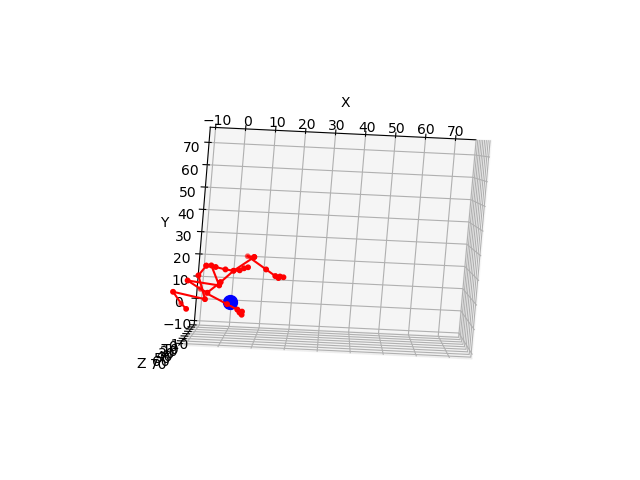

<IPython.core.display.Javascript object>


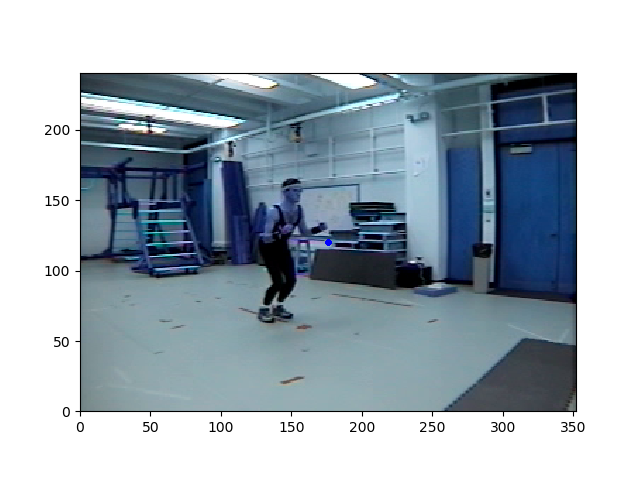

interactive(children=(IntText(value=2400, description='Vframe'), IntText(value=530, description='Vidframe'), I…

In [10]:
#Frame Hunting
import ipywidgets as widgets
from ipywidgets import interact, interactive

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

figi=plt.figure()
az= figi.add_subplot(111)

vidcap=cv2.VideoCapture('data/01_01.mpg')
vidcap.set(cv2.CAP_PROP_POS_FRAMES,215)

success,image = vidcap.read()

#Vicon Frame number
Vframe=2400
Vidframe=530
#Intrinsic Parameters
fLength = 0.494
cx = 0.648/2
cy = 0.476/2

#Extrinsic parameters
rotx = radians(0)
roty = radians(50)
rotz = radians(0)

transx = -40
transy = -10
transz = 30

def cMatrix(fLength,cx,cy):
    return np.array([[fLength,0,cx,0],[0,fLength,cy,0],[0,0,1,0]])


#def threed_change(rx,ry,rz):
# def frame_change(Vframe,Vidframe,rx,ry,rz,fLength,cx,cy,transx,transy,transz):
def frame_change(Vframe,Vidframe,rx,ry,rz,fLength,transx,transy,transz):

    ax.cla()
    #Extrinsic parameters
    rotx = radians(rx)
    roty = radians(ry)
    rotz = radians(rz)

    rvec = (np.array([rotx,roty,rotz],np.float))
    rMat = eulerAnglesToRotationMatrix(rvec)
    tvec = (np.array([transx,transy,transz],np.float))
    wMat=np.c_[rMat,tvec]

    extMCap = []
    
    vidcap=cv2.VideoCapture('data/01_01.mpg')
    vidcap.set(cv2.CAP_PROP_POS_FRAMES,Vidframe)

    success,image = vidcap.read()


    #Changing 3D points based on Extrinsic Parameters
    for i in range(MCapVal.iloc[Vframe,:].shape[0]):
        subMCapVal=MCapVal.iloc[Vframe,i]
        subMCapVal=np.append(subMCapVal,[1.])
        extMCapVal = np.dot(wMat,subMCapVal)
        extMCap.append(extMCapVal)

    extMCap=pd.DataFrame(extMCap,columns = ['x','y','z'])

    #Make scatter of Changed 3d Points
    for i in range(len(parent)):
        x,y,z = [[extMCap.iloc[parent[i]][j], 
                  extMCap.iloc[child[i]][j]] for j in range(3)] 
        ax.scatter(x,y,z,c='r', s=10)
        ax.plot(x,y,z, c='r')

    projX = []
    projY = []

    #Projection
    for i in range(extMCap.shape[0]):
        a=extMCap.iloc[i]
        a=np.append(a,[1.])

        b=np.dot(cMatrix(fLength,cx,cy),a)

        projX.append(b[0]/b[2])
        projY.append(b[1]/b[2])

    for i in range(len(parent)):
        px = [projX[parent[i]], projX[child[i]]] 
        py = [projY[parent[i]], projY[child[i]]]

        ax.scatter(px,py,fx, c='b', s=10)
        ax.plot(px,py,fx, c='r')

    ax.scatter(0,0,0,c='b',s=100)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d(-10,75)
    ax.set_ylim3d(-10,75)
    ax.set_zlim3d(-10,75)
    ax.view_init(elev=90,azim=-90)
    plt.show()
    
    projX = []
    projY = []
    az.cla()
    az.imshow(image,aspect='equal', extent=[0,vidcap.get(3),0,vidcap.get(4)])
    for i in range(extMCap.shape[0]):
        a=extMCap.iloc[i]
        a=np.append(a,[1.])
    
        b=np.dot(cMatrix(fLength,cx,cy),a)

        projX.append(b[0]/b[2])
        projY.append(b[1]/b[2])
        
        
    projPixX = np.array(projX)
    projPixY = np.array(projY)
    
    projPixX *= 352/0.648
    projPixY *=  240/0.476
    
    for i in range(len(parent)):
        px = [projPixX[parent[i]], projPixX[child[i]]] 
        py = [projPixY[parent[i]], projPixY[child[i]]]
    
        az.scatter(px,py, c='b', s=10)
        az.plot(px,py, c='r')
        
    figi.canvas.draw_idle()
    vidcap.release()

interact(frame_change,
        Vframe = widgets.IntText(value=2400),
        Vidframe = widgets.IntText(value=530),
        rx = widgets.IntText(value=84.31),
        ry = widgets.IntText(value=26.58),
        rz = widgets.IntText(value=49.50),
        fLength = widgets.IntText(value=0.494),
#         cx = widgets.IntText(value=300),
#         cy = widgets.IntText(value=80),
        transx = widgets.IntText(value=-28.83),
        transy = widgets.IntText(value=-3.81),
        transz = widgets.IntText(value=78.88)
        );
        

rx 0 
ry 40
rz -2
transx -20
transy -19
transz -80
flength -280
cx 210
cy 133
vidf 625<- change
vframe 2749
2d Projection is on side of 3d image, not side at 0,0,0.
<br>
615 & 2749 work
Test with frame 215 & 1137
604 &2700
<br>
Next Steps:  Use calibrateCamera CV2 function on 3 views.<br>
view 1: 203 & 1087 <br>
view 2: 615 & 2749<br>
view 3: 530&2400<br>

Image shape: (240, 352, 3)

<IPython.core.display.Javascript object>


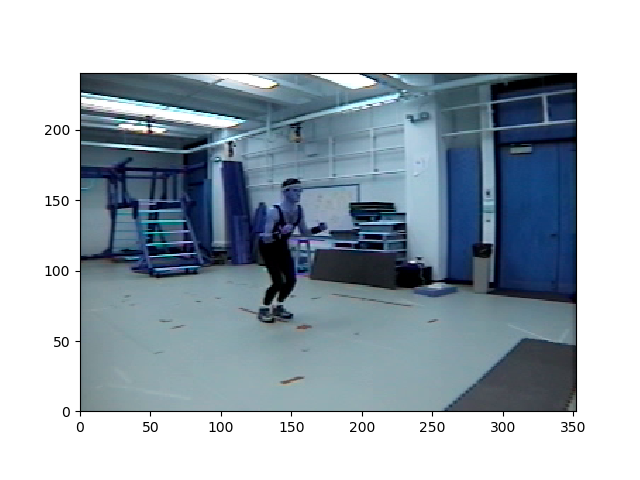

In [17]:
plt.figure()
vidcap=cv2.VideoCapture('data/01_01.mpg')
vidcap.set(cv2.CAP_PROP_POS_FRAMES,530)

success,image = vidcap.read()

image.shape
plt.imshow(image,aspect='equal', extent=[0,vidcap.get(3),0,vidcap.get(4)])

In [10]:
pd.read_csv('data\\2dProjPts530.csv',sep=':')
# MCapVal.iloc[2400]

,"Name,X,Y"
0,"VFrame,2400,0"
1,"VidFrame,530,0"
2,"root,137,120"
3,"lowerback,139,128"
4,"upperback,144,132"
5,"thorax,145,139"
6,"lowerneck,146,146"
7,"upperneck,148,153"
8,"head,147,158"
9,"rclavicle,135,141"


In [24]:
# cx, cy & fx in pixels
# fx =focal length [12.5 mm] *imagewidth (pixels)[352] / sensor width (mm) [16.45mm]
# fx = 267.3



cameraMatrix = cMatrix(267.3,352/2,240/2)
cameraMatrix=cameraMatrix[:,:-1]
cameraMatrix
distCoeffs=0
rvec = np.array([rotx,roty,rotz])
tvec = np.array([transx,transy,transz]).astype('float32')

objX=[]
objY=[]
objZ=[]

objectPoints=MCapVal.iloc[2400]
objectPoints= objectPoints.drop(labels=['lhipjoint','rhipjoint'])
# objectPoints = objectPoints.values
for i in range(len(objectPoints)):
    objX.append(objectPoints[i][0][0])
    objY.append(objectPoints[i][1][0])
    objZ.append(objectPoints[i][2][0])
    
objMat = np.array((objX,objY,objZ))
#     x = objectPoints[i][0][0]
# for i in range(len(parent)):
#     x,y,z = [[MCapVal.iloc[2749,parent[i]][j][0], 
#               MCapVal.iloc[2749,child[i]][j][0]] for j in range(3)] 
#     ax.scatter(x,y,z,c='r', s=10)
#     ax.plot(x,y,z, c='r')

imagePoints = pd.read_csv('data\\2dProjPts530.csv',sep=',',skiprows=[1,2])
imagePoints=imagePoints.iloc[:,1:]
imagePoints['X'] = imagePoints['X'].astype('float32')
imagePoints['Y'] = imagePoints['Y'].astype('float32')
imagePointVal = imagePoints.values
# imageMat = np.ascontiguousarray(imagePoints)

pnpVal = cv2.solvePnP(
    objMat.T,
    imagePointVal,
    cameraMatrix,
    distCoeffs,
    rvec,
    tvec,
    useExtrinsicGuess=1)

In [27]:
# objMat.shape,imageMat.T.shape
# imagePoints['X']*=0.648/352
pnpVal,pnpVal[1][0]

((True,
  array([1.47190316, 0.46214526, 0.84579781]),
  array([-29.817324 ,  -3.7204297,  84.50048  ], dtype=float32)),
 1.4719031646707625)

In [28]:
degrees(pnpVal[1][0]),degrees(pnpVal[1][1]),degrees(pnpVal[1][2])

(84.33383918758412, 26.478972778654622, 48.46064509648396)

In [61]:
degrees(rvec[0]),degrees(rvec[1]),degrees(rvec[2])

(84.51646571841077, 27.114508812133764, 47.99356887180849)

In [ ]:
imagePoints